In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
pl.rcParams.update({'font.size': 12})          # Set the standard font size of the plots to 11pt.
pl.rcParams.update({'figure.figsize': [13,6]}) # Set the standard figure size.

In [2]:
k1 = 5.
k2 = 6.

nx = 512
nt = 512

x = np.linspace(0., 4.*2.*np.pi, nx)
t = np.linspace(0., 100., nt)
xx, tt = np.meshgrid(x, t)

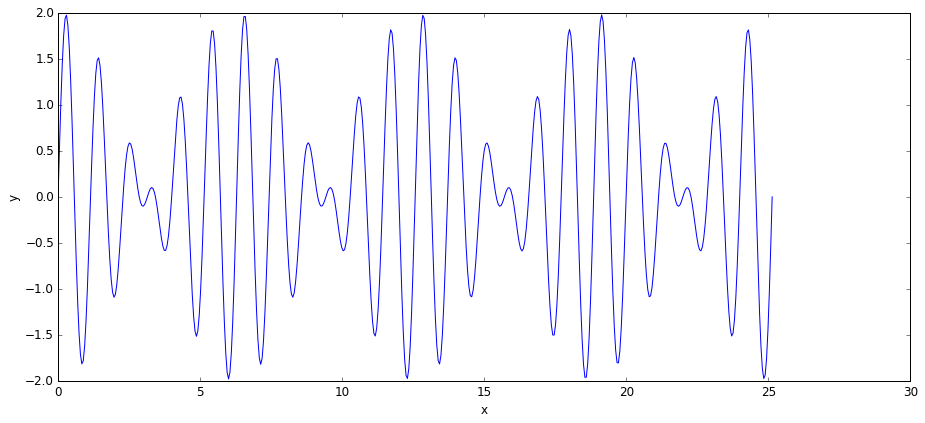

In [3]:
g = 9.81
H = 1.
omega1 = (g*k1)**.5 
omega2 = (g*k2)**.5

y1 = np.sin(k1*xx - omega1*tt)
y2 = np.sin(k2*xx - omega2*tt)
y = y1 + y2

pl.plot(x, y[0,:])
pl.xlabel('x')
pl.ylabel('y')
pl.tight_layout()

In [6]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    pl.close(anim._fig)
    return HTML(anim_to_html(anim))
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = pl.figure()
xmin, xmax = np.min(x), np.max(x)
ymin, ymax = np.min(y), np.max(y)
ymin -= 0.05 * (ymax-ymin)
ymax += 0.05 * (ymax-ymin)
ax = pl.axes(xlim=(xmin, xmax), ylim=(ymin, ymax), xlabel='x', ylabel='h')
ax.plot(x, y[0,:], 'b--')
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, y[i,:])
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=y.shape[0], interval=1, blit=True)

# call our new function to display the animation
display_animation(anim)